<a href="https://colab.research.google.com/github/MichaelAshton/virtual_betting/blob/feature%2Fgolden-dataset/demo_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A demo of connecting the different eureka classes so far for a training run

### imports 

In [ ]:
!nvidia-smi

In [ ]:
!pip uninstall -y eureka254

In [ ]:
!pip install mxnet-cu100==1.5.0
# replace the branch name at the end (master) with your preferred branch
!pip install git+https://github.com/MichaelAshton/time-series-prediction.git@master

In [ ]:
# mount google dirve
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

### Eureka package usage

In [1]:
import comet_ml

In [2]:
# set comet ml API and REST API Keys here
API_KEY = ""
REST_API_KEY = "" 
workspace= ""

In [3]:
db_username = ""
db_password = ""
db_ip = ""
db_database = ""
scrappy_username=""
scrappy_password=""

%env db_username=$db_username
%env db_password={db_password}
%env db_ip={db_ip}
%env db_database={db_database}
%env scrappy_username={scrappy_username}
%env scrappy_password={scrappy_password}

env: db_username=ashton
env: db_password=y0ungm1najl
env: db_ip=188.166.40.212
env: db_database=ashton
env: scrappy_username=0775558625
env: scrappy_password=G@me0fthr0nes


In [4]:
from eureka254.TrainingHarness import TrainingHarness
import os
import numpy as np
from sklearn.metrics import *
from eureka254.DB import DB
from eureka254.ModelKwargs import *
import matplotlib.pyplot as plt

from eureka254.EurekaRegression import EurekaRegression
from eureka254.Evaluation import Evaluation


DB = DB()
TrainingHarness = TrainingHarness()
EurekaRegression = EurekaRegression()
Evaluation = Evaluation()

INFO:gluonts.model.wavenet._estimator:Using dilation depth 8 and receptive field length 256
DEBUG:matplotlib:$HOME=/home/mykashton
DEBUG:matplotlib:CACHEDIR=/home/mykashton/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/mykashton/.cache/matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
INFO:gluonts.model.wavenet._estimator:Using dilation depth 8 and receptive field length 256


In [5]:
training_pred_score_path = './'

In [6]:
saved_models_path = os.path.join(training_pred_score_path, 'saved_models')

In [7]:
os.makedirs(saved_models_path, exist_ok=True)

In [8]:
# get golden dataset
df = DB.create_golden_dataset()

In [9]:
# get the teams - teams_id pairs
teams_ids_df = DB.get_all_teams()

In [10]:
teams_ids_df.team1_id.unique().shape

(20,)

In [11]:
df.set_index('teams_id', inplace=True)
teams_ids_df.set_index('teams_id', inplace=True)

df['teams_name'] = teams_ids_df.loc[df.index, 'teams_name']

df = df.reset_index().set_index('teams_name')
df.rename(columns={'total_goals': 'goals'}, inplace=True)

In [12]:
# preprocess by position (all 10 positions)
teams_df, train_ds, test_ds = TrainingHarness.preprocess_by_position(df)

INFO:eureka254.TrainingHarness.TrainingHarness:Starting preprocessing time series by position before training routine starts
INFO:eureka254.TrainingHarness.TrainingHarness:Finished preprocessing time series by position


In [13]:
# preprocess by team (all 20 teams)
teams_df, train_ds, test_ds = TrainingHarness.preprocess_by_teams(df)

INFO:eureka254.TrainingHarness.TrainingHarness:Starting preprocessing time series by teams before training routine starts
INFO:eureka254.TrainingHarness.TrainingHarness:Finished preprocessing time series by teams


In [14]:
experiment = EurekaRegression.fit(x_y_data=df, training_pred_score_path=training_pred_score_path, type_of_time_series='teams', cv_flag=False, api_key=API_KEY, rest_api_key=REST_API_KEY, param_search='bayes', workspace=workspace)

INFO:eureka254.TrainingHarness.TrainingHarness:Starting preprocessing time series by teams before training routine starts
INFO:eureka254.TrainingHarness.TrainingHarness:Finished preprocessing time series by teams
INFO:eureka254.TrainingHarness.TrainingHarness:Starting generic score train loop
COMET WARNING: Passing Experiment through Optimizer constructor is deprecated; pass them to Optimizer.get_experiments or Optimizer.next
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: optimizer_url, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_OPTIMIZER_URL
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_OPTIMIZER_URL
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_OPTIMIZER_URL
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching 

DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: rest_v2_minimal_backend_version, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv

DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: sdk_os_packages_http, namespace: ['comet', 'override_feature']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_OVERRIDE_FEATURE_SDK_OS_PACKAGES_HTTP
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_OVERRIDE_FEATURE_SDK_OS_PACKAGES_HTTP
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <

DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: url_override, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_URL_OVERRIDE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_URL_OVERRIDE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_URL_OVERRIDE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for C

DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:everett:Looking up key: cleaning, namespace: ['comet', 'timeout']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_TIMEOUT_CLEANING
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_TIMEOUT_CLEANING
DEBUG:everett:Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': False, 'COMET_OVERRIDE_FEATURE_PUBLIC-PANELS': False, 'COMET_OVERRIDE_FEATURE_SYSTEM-METRICS': True, 'COMET_OVERRIDE_FEATURE_SYSTEM-METRICS-GPU': True, 'COMET_OVERRIDE_FEATURE_SDK_GIT_PATCH': True, 'COMET_OVERRIDE_FEATURE_SDK_GPU_MONITOR': True, 'COMET_OVERRIDE_FEATURE_SDK_HTTP_LOGGING': False, 'COMET_OVERRIDE_FEATURE_PLOTLY-CHARTS': True, 'COMET_OVERRIDE_FEATURE_QUERY-FILTER': True, 'COMET_OVERRIDE_FEATURE_QUERY-URL-PARSER': False, 'COMET_OVERRIDE_FEATURE_PAYMENTS': True, 'COMET_OVERRIDE_FEATURE_GROUPING': True, 'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_F

DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: others_ignore, namespace: ['comet', 'logging']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_LOGGING_OTHERS_IGNORE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_LOGGING_OTHERS_IGNORE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_LOGGING_OTHERS_IGNORE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: metrics_ignore, namespace: ['comet', 'logging']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_LOGGING_METRICS_IGNORE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_LOGGING_METRICS_IGNORE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_LOGGING_METRICS_IGNORE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: parameters_ignore, namespace: ['comet', 'logging']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_LOGGING_PARAMETERS_IGNORE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_LOGGING_PARAMETERS_IGNORE
DEBU

DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: sdk_http_logging, namespace: ['comet', 'override_feature']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_OVERRIDE_FEATURE_SDK_HTTP_LOGGING
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_OVERRIDE_FEATURE_SDK_HTTP_LOGGING
DEBUG:everett:Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': False, 'COMET_OVERRIDE_FEATURE_PUBLIC-PANELS': False, 'COMET_OVERRIDE_FEATURE_SYSTEM-METRICS': True, 'COMET_OVERRIDE_FEATURE_SYSTEM-METRICS-GPU': True, 'COMET_OVERRIDE_FEATURE_SDK_GIT_PATCH': True, 'COMET_OVERRIDE_FEATURE_SDK_GPU_MONITOR': True, 'COMET_OVERRIDE_FEATURE_SDK_HTTP_LOGGING': False, 'COMET_OVERRIDE_FEATURE_PLOTLY-CHARTS': True, 'COMET_OVERRIDE_FEATURE_QUERY-FILTER': True, 'COMET_OVERRIDE_FEATURE_QUERY-URL-PARSER': False, 'COMET_OVERRIDE_FEATURE_PAYMENTS': True, 'COMET_OVERRIDE_FEATURE_GROUPING': True, 'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/michaelashton/optimizer-simplefeedforward-20200223-142932/8d518068d536466bb2db01dd3672b86f

INFO:eureka254.TrainingHarness.TrainingHarness:model_kwarg['num_hidden_dimensions'] : [32, 4]
INFO:eureka254.TrainingHarness.TrainingHarness:
 model.trainer.lr : 0.005837668293830805
INFO:eureka254.TrainingHarness.TrainingHarness:model.trainer.epochs : 2

INFO:root:Start model training
INFO:root:Number of parameters in SimpleFeedForwardTrainingNetwork: 235
INFO:root:Epoch[0] Learning rate is 0.005837668293830805
100%|██████████| 50/50 [00:00<00:00, 85.41it/s, avg_epoch_loss=2.51]
INFO:root:Epoch[0] Elapsed time 0.589 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=2.508046
INFO:root:Epoch[1] Learning rate is 0.005837668293830805
100%|██████████| 50/50 [00:00<00:00, 93.60it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[1] Elapsed time 0.540 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=2.376962
INFO:root:Loading param

DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: rest_v2_minimal_backend_version, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_REST_V2_MINIMAL_BACKEND_VERSION
DEBU

DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: sdk_os_packages_http, namespace: ['comet', 'override_feature']
DEBUG:everett:Searching <ConfigOSEnv> for C

DEBUG:everett:Searching <ConfigOSEnv> for COMET_URL_OVERRIDE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_URL_OVERRIDE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_URL_OVERRIDE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Found nothing--returning NO_VALU

DEBUG:everett:Searching <ConfigOSEnv> for COMET_TIMEOUT_CLEANING
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_TIMEOUT_CLEANING
DEBUG:everett:Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': False, 'COMET_OVERRIDE_FEATURE_PUBLIC-PANELS': False, 'COMET_OVERRIDE_FEATURE_SYSTEM-METRICS': True, 'COMET_OVERRIDE_FEATURE_SYSTEM-METRICS-GPU': True, 'COMET_OVERRIDE_FEATURE_SDK_GIT_PATCH': True, 'COMET_OVERRIDE_FEATURE_SDK_GPU_MONITOR': True, 'COMET_OVERRIDE_FEATURE_SDK_HTTP_LOGGING': False, 'COMET_OVERRIDE_FEATURE_PLOTLY-CHARTS': True, 'COMET_OVERRIDE_FEATURE_QUERY-FILTER': True, 'COMET_OVERRIDE_FEATURE_QUERY-URL-PARSER': False, 'COMET_OVERRIDE_FEATURE_PAYMENTS': True, 'COMET_OVERRIDE_FEATURE_GROUPING': True, 'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_OLD_TEAMS': True, 'COMET_OVERRIDE_FEATURE_GIT-REPRODUCE': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_REPRO

COMET INFO:     optimizer_metric      : loss
COMET INFO:     optimizer_metric_value: 2.6461803913116455
COMET INFO:     optimizer_objective   : minimum
COMET INFO:     optimizer_parameters  : {"batch_size": 64, "hidden2_layer_size": 16, "hidden_layer_size": 16, "learning_rate": 0.004133128996142861}
COMET INFO:     optimizer_pid         : b2ae8ac38c59c2330a1cc4308f30f0e19672a7aa
COMET INFO:     optimizer_process     : 3863
COMET INFO:     optimizer_trial       : 1
COMET INFO:     optimizer_version     : 1.0.24
COMET INFO:   Uploads:
COMET INFO:     git-patch: 1
COMET INFO: ----------------------------
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notification/experiment HTTP/1.1" 200 73
COMET INFO: Uploading stats to Comet before program termination (may take several seconds)
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']


TypeError: get() got an unexpected keyword argument 'project'

In [ ]:
tss, preds, load_path = EurekaRegression.predict(x_y_data=test_ds, training_pred_score_path=training_pred_score_path)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:

In [ ]:
for model_name in tss.keys():
    
    save_path = os.path.join(training_pred_score_path, f'saved_models/{model_name}_gluonts_metrics.csv')
    
    metrics_df = Evaluation.gluonts_evaluation(tss[model_name], preds[model_name], load_path[model_name], test_ds)
    
    metrics_df.to_csv(save_path)
    
#     experiment.log_asset(save_path)
        
    print(f'{model_name} : \n {metrics_df[["MASE", "abs_error", "MSE"]].head()}\n\n' )

In [ ]:
def plot_log_and_save_graphs(tss, preds, profit_df, saved_models_path, model_name, plot_length=300, prediction_intervals = (50.0, 90.0)):
    

    for index in profit_df.index.values[:5]:  
        
        experiment.log_metrics(profit_df.loc[index, ['mae', 'acc', 'profit', 'profit_rate']].to_dict(), prefix=f'{index}_{model_name}')

        legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        tss[index][-plot_length:].plot(ax=ax)  # plot the time series
        preds[index].plot(prediction_intervals=prediction_intervals, color='g')
        plt.grid(which="both")
        plt.legend(legend, loc="upper left")

        fig.canvas.draw()

        figure_name = f'{index}_{model_name}'

        experiment.log_figure(figure_name=figure_name, figure=fig)

        plt.savefig(os.path.join(saved_models_path, figure_name))



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) obliq

SimpleFeedForward : 
       r2    mse   acc profit profit_rate     odd_name investment   mae
18 -1.24  13.57  0.43    800      228.57  over45_odds        350  2.69
14 -1.09  11.07  0.71   1000      142.86  over35_odds        700  2.54
15 -1.95  16.36  0.56    650       72.22  over35_odds        900  3.04
3  -1.45  14.29  0.55    650          65  over35_odds       1000  3.09
2  -3.58  12.62   0.5    600          60  over35_odds       1000  2.26




DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/ashton/miniconda3/envs/gluon/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigIniEnv: /home/ashton/.comet.config> for key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:eve

DeepAREstimate : 
       r2    mse   acc profit profit_rate     odd_name investment   mae
4  -0.68  11.32  0.43    600      171.43  over45_odds        350  2.81
16 -0.49  11.27  0.33    350      116.67  over45_odds        300  2.52
13  -0.7  11.16  0.33    500      111.11  over45_odds        450  2.61
2  -1.77   7.63  0.57    600       85.71  over35_odds        700  2.33
10 -1.15   7.48  0.57    550       78.57  over35_odds        700  2.13




DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigIniEnv: /home/ashton/.comet.config> for key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigIniEnv: /home/ashton/.comet.config> for key: value, namespace: ['comet', 'allow_header']
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/visualizations/upload?experimentId=c567edecf3194b7abee4bf7c93283677&projectId=279e46450f4447839596e87e8094354a&apiKey=f3NdOiTo9ajIDbnSh

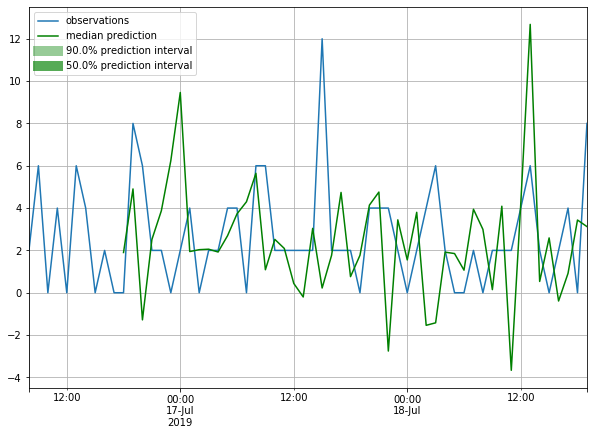

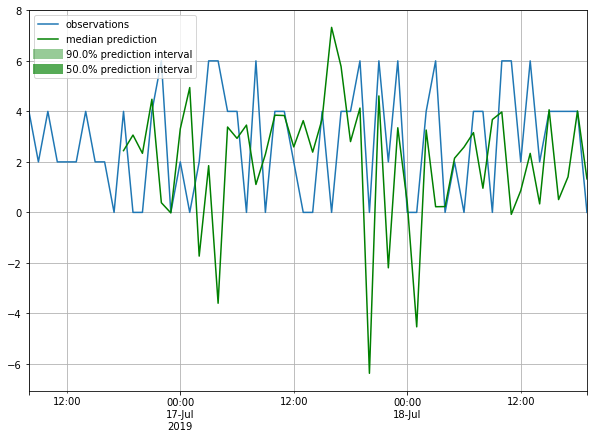

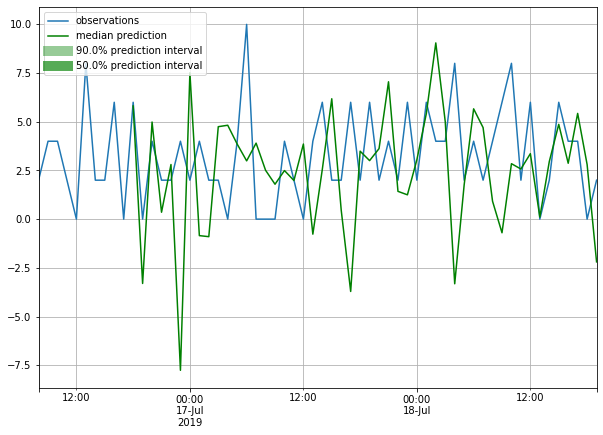

DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/visualizations/upload?experimentId=c567edecf3194b7abee4bf7c93283677&projectId=279e46450f4447839596e87e8094354a&apiKey=f3NdOiTo9ajIDbnShlxPcE3v6&figCounter=3&runId=q3Xab2lFsRpnY8mRqpWQpv6h7&overwrite=False&imageId=beec33b7716d4ecda9a660a4b3dd8a2f&figName=3_SimpleFeedForward HTTP/1.1" 200 5
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/visualizations/upload?experimentId=c567edecf3194b7abee4bf7c93283677&projectId=279e46450f4447839596e87e8094354a&apiKey=f3NdOiTo9ajIDbnShlxPcE3v6&figCounter=4&runId=q3Xab2lFsRpnY8mRqpWQpv6h7&overwrite=False&imageId=513cb579ccdf4d37be4ba9a4751127de&figName=2_SimpleFeedForward HTTP/1.1" 200 5


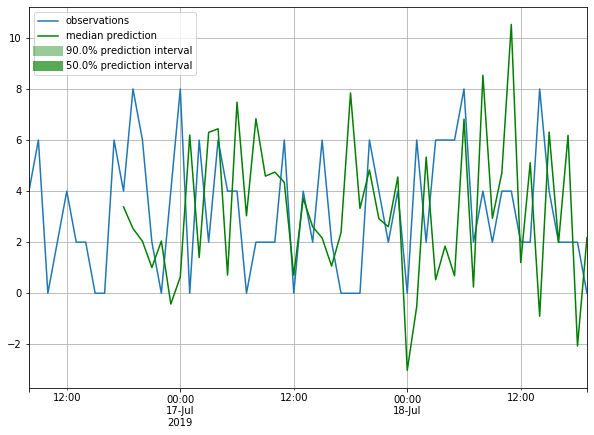

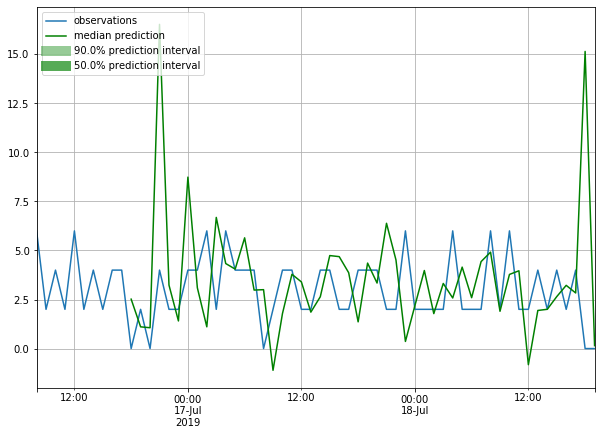

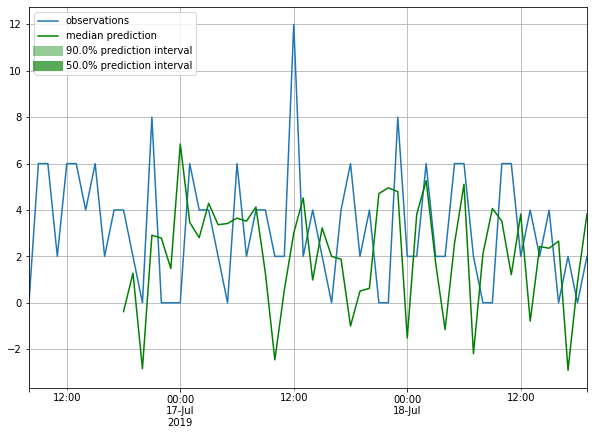

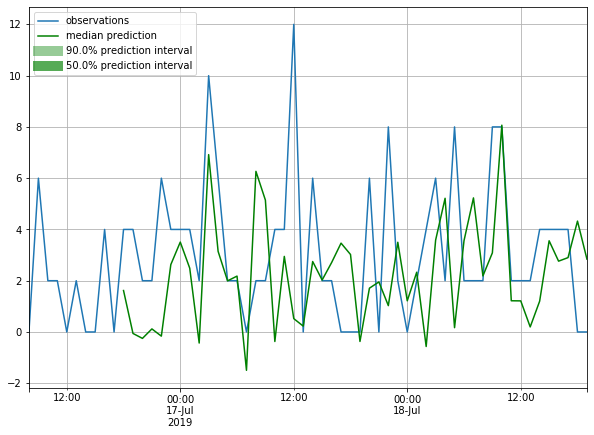

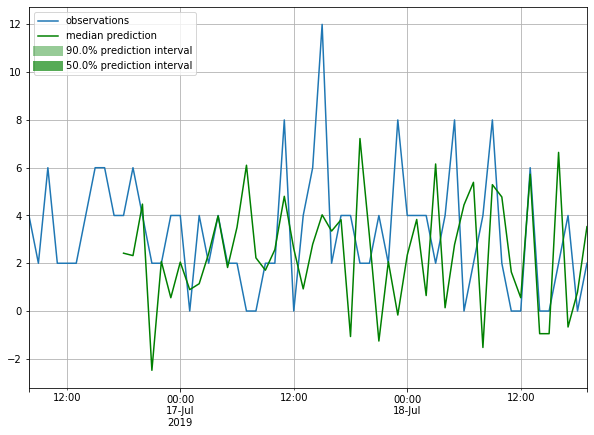

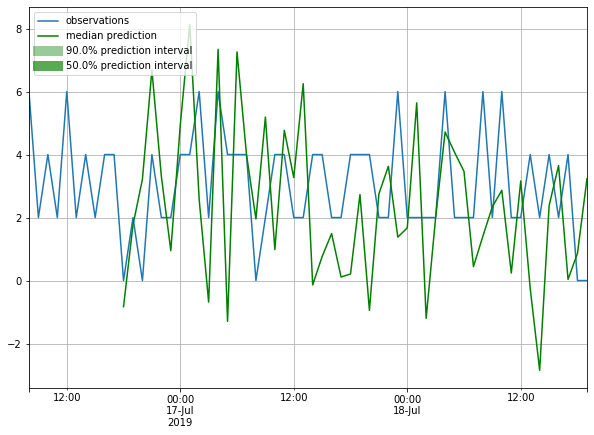

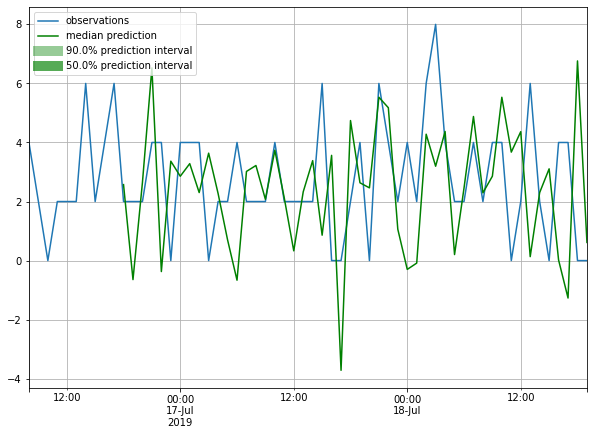

In [22]:
for model_name in tss.keys():
    
    save_path = os.path.join(training_pred_score_path, f'saved_models/{model_name}_profits.csv')
    
    profit_df = Evaluation.profit_evaluation(test_ds, preds[model_name], teams_df)
    
    profit_df.to_csv(save_path)
        
    print(f'{model_name} : \n {profit_df.head()}\n\n' )
    
    plot_log_and_save_graphs(tss[model_name], preds[model_name], profit_df, saved_models_path, model_name, plot_length=60, prediction_intervals=(50.0, 90.0))

In [23]:
for model_name in tss.keys():
    
    print(f'{model_name} : \n {Evaluation.plot_preds_graph(tss[model_name], preds[model_name], plot_length=60, prediction_intervals=(50.0, 90.0))}\n\n' )

interactive(children=(IntSlider(value=5, description='w', max=15, min=-5), Output()), _dom_classes=('widget-in…

SimpleFeedForward : 
 None




interactive(children=(IntSlider(value=5, description='w', max=15, min=-5), Output()), _dom_classes=('widget-in…

DeepAREstimate : 
 None




In [24]:
import shutil
shutil.make_archive(saved_models_path, 'zip', saved_models_path)

'/mnt/f/betin_project/virtual_betting/saved_models.zip'

In [25]:
experiment.log_asset(saved_models_path + '.zip')

{'web': 'https://www.comet.ml/api/asset/download?assetId=588ca248357b462e81961405fe20f85c&experimentKey=c567edecf3194b7abee4bf7c93283677',
 'api': 'https://www.comet.ml/api/rest/v1/asset/get-asset?assetId=588ca248357b462e81961405fe20f85c&experimentKey=c567edecf3194b7abee4bf7c93283677'}

In [26]:
experiment.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
COMET INFO:   Data:
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
COMET INFO:     url: https://www.comet.ml/michaelashton/run-20190815-193237/c567edecf3194b7abee4bf7c93283677
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
COMET INFO:   Metrics [count] (min, max):
DEBUG:everett:Searching <ConfigIniEnv: /home/ashton/.comet.config> for key: name, namespace: ['comet', 'allow_header']
COMET INFO:     10_DeepAREstimate_acc           : (0.57, 0.57)
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
COMET INFO:     10_DeepAREstimate_mae           : (2.130000114440918, 2.130000114440918)
COMET INFO:     10_DeepAREstimate_profit        : (550.0, 550.0)
DEBUG:everett:Found nothing--returning NO_VALUE
COMET INFO:     10_DeepAREstimate_profit_rate   : (78.57, 78.57)
DEBUG:ever